# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 1000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 200

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

RMSE: 26.781352062626528


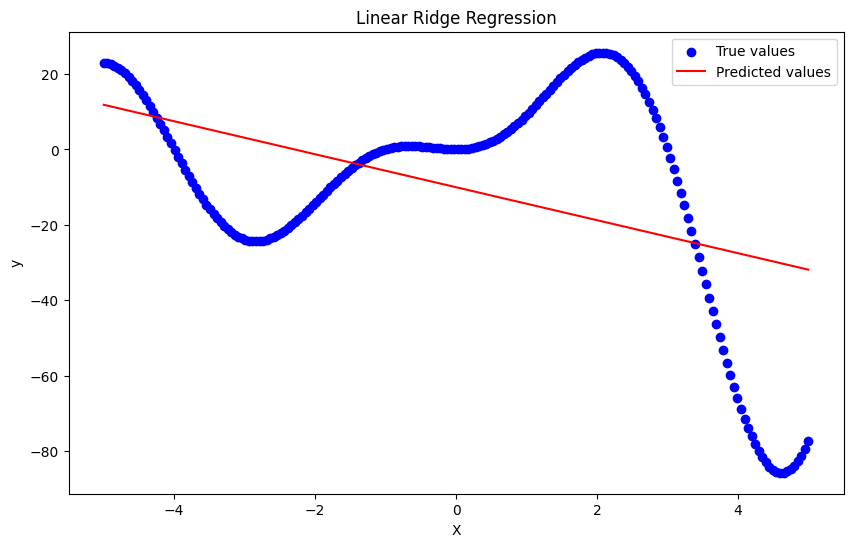

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LRR = LinearRegression().fit(X_train, y_train)
y_pred = LRR.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.title('Linear Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Best alpha found: 1980
Polynomial kernel of degree 9, RMSE: 0.5960619953105719


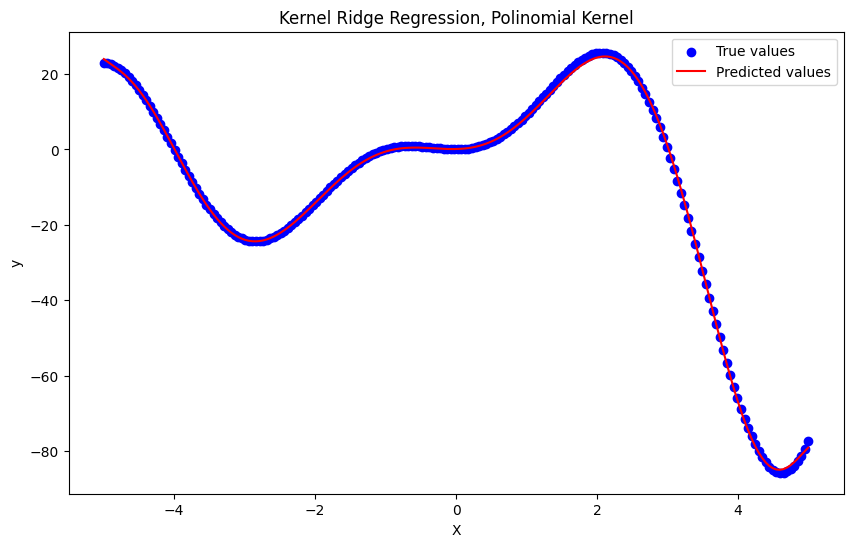

In [47]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# the best degree for polynomial kernelization is the highest I can get
my_degree = 9
# I will do grid search for alpha, the strenght of the regularization
param_grid = {'alpha': np.arange(1980, 2080, 5)}
grid_search = GridSearchCV(KernelRidge(kernel='polynomial', degree=my_degree), param_grid)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha found: {best_alpha}")

Poly_KRR = KernelRidge(alpha=best_alpha, kernel='polynomial', degree=my_degree).fit(X_train, y_train)
y_pred = Poly_KRR.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Polynomial kernel of degree {my_degree}, RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.title('Kernel Ridge Regression, Polinomial Kernel')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Gaussian kernel with gamma 0.29000000000000004, RMSE: 0.855319854168435


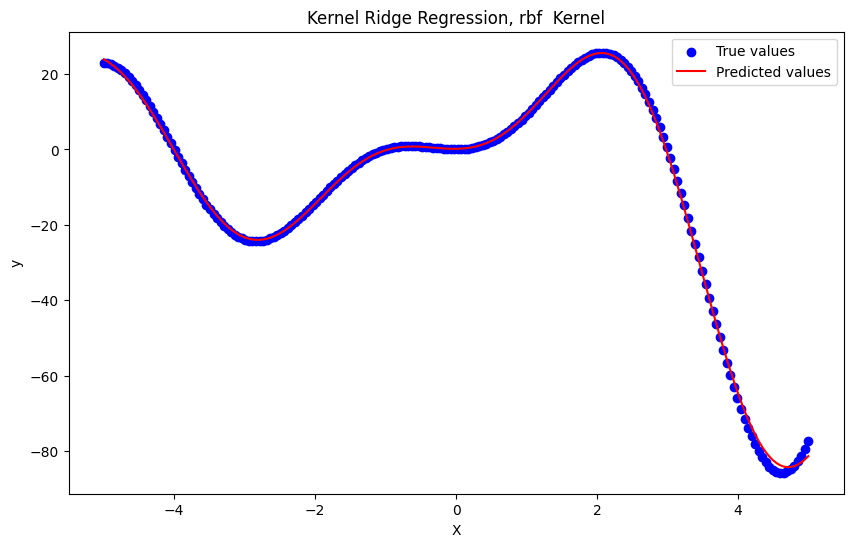

In [5]:
param_grid = {'gamma': np.arange(0.01, 0.4, 0.01)}

# Will do a grid search to find the best gamma
grid_search = GridSearchCV(KernelRidge(kernel='rbf'), param_grid)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']

rbf_KRR = KernelRidge(kernel='rbf', gamma=best_gamma).fit(X_train, y_train)
y_pred = rbf_KRR.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Gaussian kernel with gamma {best_gamma}, RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.title('Kernel Ridge Regression, rbf  Kernel')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

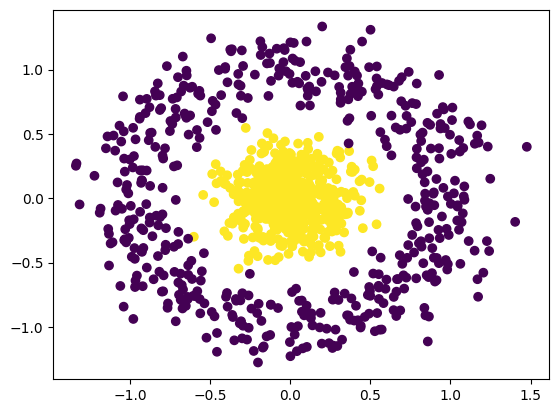

In [48]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

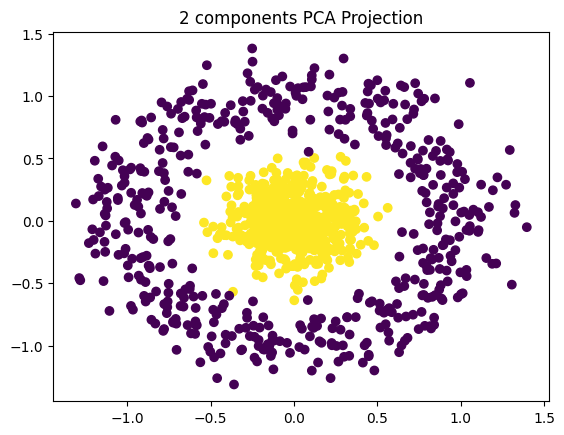

In [49]:
from sklearn.decomposition import PCA

# Data is pretty uniform in the interval [0,1], I will not standardize it before applying PCA

pca_2 = PCA(n_components=2).fit(X)
projection_2 = pca_2.transform(X)

plt.scatter(projection_2[:, 0], projection_2[:, 1], c = y, cmap='viridis')
plt.title('2 components PCA Projection')
plt.show() #In 2d it's not useful in any way

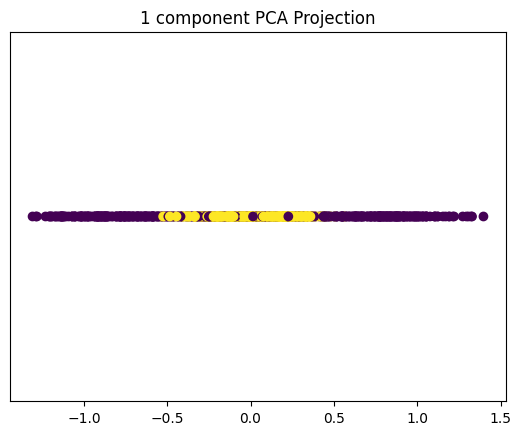

In [50]:
pca_1 = PCA(n_components=1).fit(X)
projection_1 = pca_1.transform(X)

plt.scatter(projection_1[:], np.zeros(len(X)), c=y, cmap='viridis')
plt.yticks([])  # Remove intervals on y axis
plt.title('1 component PCA Projection')
plt.show()  # In 1d this dataset becomes a pretty mess

Best gamma found: 2.350000000000001;
Accuracy of SVC: 0.992


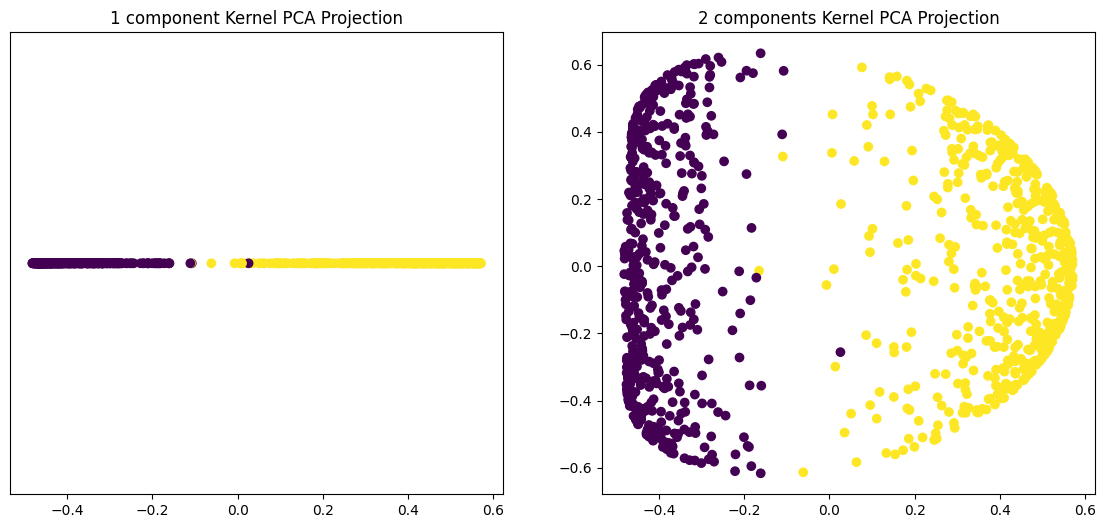

In [51]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import LinearSVC

# Cross validation on gamma using svm to gauge the 'goodness' of the parameter

test_gammas = np.arange(0.1, 5, 0.05)
best_found = {
    'gamma': -1,
    'score': float('-inf')
    }
for gamma in test_gammas:
    KPCA1_train = KernelPCA(n_components=1, kernel='rbf', gamma = gamma).fit_transform(X_train)
    KPCA1_test = KernelPCA(n_components=1, kernel='rbf', gamma = gamma).fit_transform(X_test)
    SVC1 = LinearSVC().fit(KPCA1_train, y_train)
    acc = SVC1.score(KPCA1_test, y_test)
    if acc > best_found['score']:
        # print(f'found a better gamma: {gamma}')
        best_found['gamma'] = gamma
        best_found['score'] = acc
        
print(f'Best gamma found: {best_found['gamma']};\nAccuracy of SVC: {best_found['score']}')

KPCA1 = KernelPCA(n_components=1, kernel='rbf', gamma=best_found['gamma']).fit_transform(X)
KPCA2 = KernelPCA(n_components=2, kernel='rbf', gamma=best_found['gamma']).fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(KPCA1[:, 0], np.zeros(len(KPCA1)), c=y, cmap='viridis')
axes[0].set_title('1 component Kernel PCA Projection')
axes[0].set_yticks([])
axes[1].scatter(KPCA2[:, 0], KPCA2[:, 1], c=y, cmap='viridis')
axes[1].set_title('2 components Kernel PCA Projection')
plt.show()

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.24337e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.22817e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=7.17703e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warni

Best parameters found: {'alpha': 0.1, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Accuracy of SVC after PCA: 0.548
Accuracy of SVC after kernel PCA: 0.416


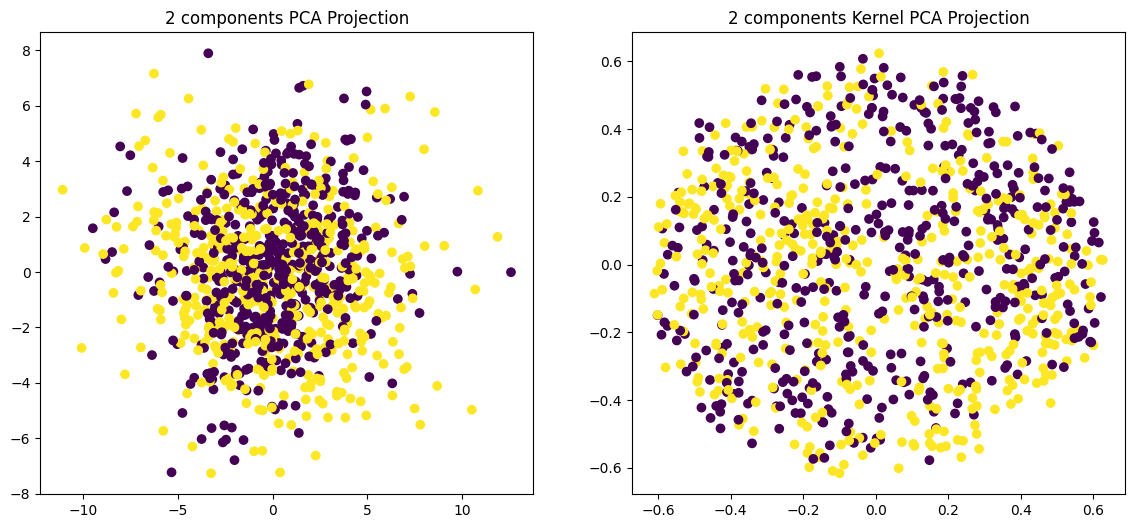

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, class_sep=0.4, random_state=155)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=155)

param_grid = {
    'kernel': ['rbf', 'poly'],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10],
    'degree': [2, 3, 4, 5],
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(KernelRidge(), param_grid, cv=3).fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Compute accuracy of SVC with found parameters using a support vector classifier
PCA2_train = PCA(n_components=2).fit_transform(X_train)
PCA2_test = PCA(n_components=2).fit_transform(X_test)
KPCA2_train = KernelPCA(n_components=2, kernel=best_params['kernel'], gamma=best_params['gamma'], degree=best_params['degree'], alpha=best_params['alpha']).fit_transform(X_train)
KPCA2_test = KernelPCA(n_components=2, kernel=best_params['kernel'], gamma=best_params['gamma'], degree=best_params['degree'], alpha=best_params['alpha']).fit_transform(X_test)
SVC2 = LinearSVC().fit(PCA2_train, y_train)
KSVC2 = LinearSVC().fit(KPCA2_train, y_train)
print(f'Accuracy of SVC after PCA: {SVC2.score(PCA2_test, y_test)}\nAccuracy of SVC after kernel PCA: {KSVC2.score(KPCA2_test, y_test)}')

PCA2 = PCA(n_components=2).fit_transform(X)
KPCA2 = KernelPCA(n_components=2, kernel=best_params['kernel'], gamma=best_params['gamma'], degree=best_params['degree'], alpha=best_params['alpha']).fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(PCA2[:, 0], PCA2[:, 1], c=y, cmap='viridis')
axes[0].set_title('2 components PCA Projection')
axes[1].scatter(KPCA2[:, 0], KPCA2[:, 1], c=y, cmap='viridis')
axes[1].set_title('2 components Kernel PCA Projection')
plt.show()

Con dimensioni intrinseche più alte rispetto ai dataset giocattolo con cui abbiamo avuto a che fare in precedenza, e senza informazioni a priori sulla sua forma, trovare il kernel e gli iperparametri giusti per permettere la separabilità lineare diventa come cercare un ago in un pagliaio. proviamo con un dataset un po' più piccolo




Best gamma: 0.03;
Best alpha: 0.736
Accuracy of SVC after PCA: 0.428
Accuracy of SVC after kernel PCA: 0.736


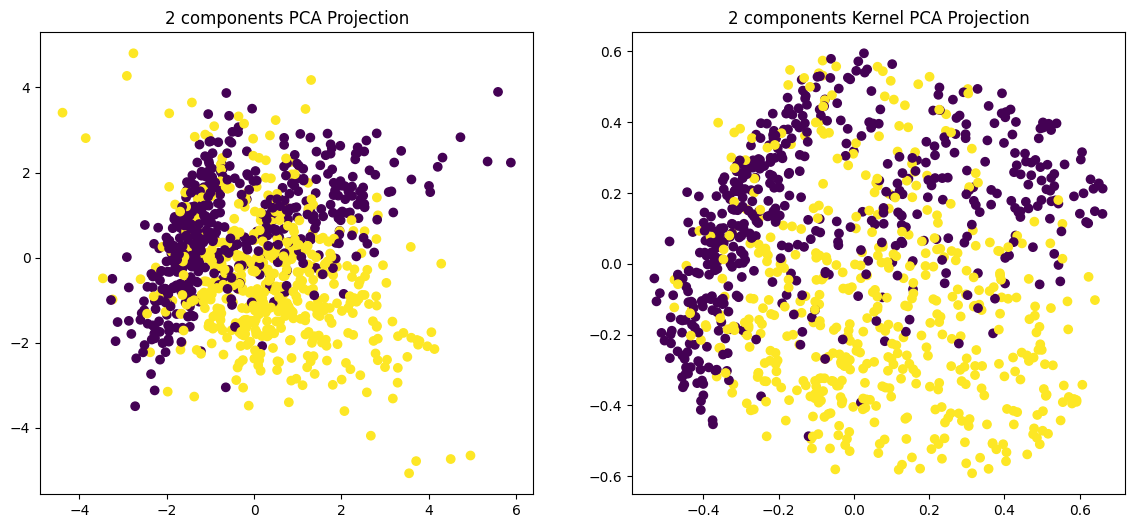

In [66]:
# Try again with lower dimensions dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, n_classes=2, class_sep=0.6, random_state=155)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=155)

gamma_candidates = np.arange(0.01, 0.5, 0.01)
alpha_candidates = np.arange(0.2, 4, 0.2)
found = {
    'gamma': -1,
    'alpha': -1,
    'acc': -1
}
for gamma in gamma_candidates:
    for alpha in alpha_candidates:
        KPCA2_train = KernelPCA(n_components=2, kernel='rbf', gamma= gamma, alpha=alpha).fit_transform(X_train)
        KPCA2_test = KernelPCA(n_components=2, kernel='rbf', gamma = gamma, alpha=alpha).fit_transform(X_test)
        SVC2 = LinearSVC().fit(KPCA2_train, y_train)
        acc = SVC2.score(KPCA2_test, y_test)
        if acc > found['acc']:
            print()
            found['gamma'] = gamma
            found['alpha'] = alpha
            found['acc'] = acc

print(f'Best gamma: {found['gamma']};\nBest alpha: {found['acc']}')

# Compute accuracy of SVC with found parameters
PCA2_train = PCA(n_components=2).fit_transform(X_train)
PCA2_test = PCA(n_components=2).fit_transform(X_test)
SVC2 = LinearSVC().fit(PCA2_train, y_train)
print(f'Accuracy of SVC after PCA: {SVC2.score(PCA2_test, y_test)}\nAccuracy of SVC after kernel PCA: {found['acc']}')

PCA2 = PCA(n_components=2).fit_transform(X)
KPCA2 = KernelPCA(n_components=2, kernel='rbf', gamma=found['gamma'], alpha=found['alpha']).fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(PCA2[:, 0], PCA2[:, 1], c=y, cmap='viridis')
axes[0].set_title('2 components PCA Projection')
axes[1].scatter(KPCA2[:, 0], KPCA2[:, 1], c=y, cmap='viridis')
axes[1].set_title('2 components Kernel PCA Projection')
plt.show()